In [12]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [2]:
USE_CUDA=torch.cuda.is_available()
device=torch.device('cuda' if USE_CUDA else 'cpu')
print("다음기기 사용:", device)

다음기기 사용: cpu


In [3]:
random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(7777)

In [4]:
training_epochs=15
batch_size=100

In [5]:
mnist_train=dsets.MNIST(root='MNIST_data/', 
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/',
                       train=False,
                       transform=transforms.ToTensor(),
                       download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 20437917.60it/s]


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14642293.46it/s]


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5375198.31it/s]


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [18]:
data_loader=DataLoader(dataset=mnist_train, 
                       batch_size=batch_size,
                       shuffle=True,
                       drop_last=True)

In [14]:
for X, Y in data_loader:
    print(X.size())

torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([10

In [19]:
linear=nn.Linear(784, 10, bias=True).to(device)

In [20]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(linear.parameters(), lr=0.1)

In [21]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)

    for X, Y in data_loader:
        X=X.view(-1, 28*28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=linear(X)
        cost=criterion(y_hat, Y)

        cost.backward()
        optimizer.step()
        avg_cost += cost/total_batch
    
    print('Epoch:', epoch, 'cost:', avg_cost.item())
print("Learning finished")

Epoch: 0 cost: 0.5345981121063232
Epoch: 1 cost: 0.358860045671463
Epoch: 2 cost: 0.3309590816497803
Epoch: 3 cost: 0.31640326976776123
Epoch: 4 cost: 0.30684709548950195
Epoch: 5 cost: 0.30014029145240784
Epoch: 6 cost: 0.2949557900428772
Epoch: 7 cost: 0.29070746898651123
Epoch: 8 cost: 0.2871991991996765
Epoch: 9 cost: 0.2844921946525574
Epoch: 10 cost: 0.28197339177131653
Epoch: 11 cost: 0.2794067859649658
Epoch: 12 cost: 0.27764448523521423
Epoch: 13 cost: 0.27603790163993835
Epoch: 14 cost: 0.27438369393348694
Learning finished


Accuracy: 0.8881999850273132
Label: 6
tensor([[ -217.1620, -1693.1362,  1072.4454,  -196.2915,   149.9009, -1139.6510,
          2490.5186,  -240.8808,   227.5074,  -386.9755]])
Prediction: 6


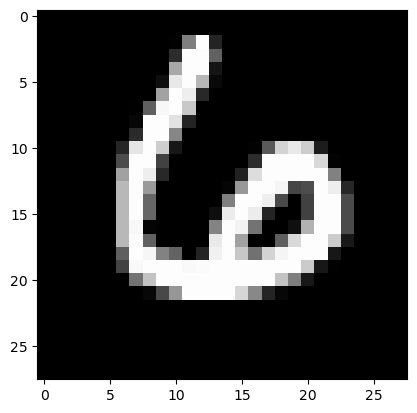

In [44]:
with torch.no_grad() : # gradient 계산 수행하지 않도록 함
    x_test=mnist_test.test_data.view(-1, 28*28).float().to(device)
    y_test=mnist_test.test_labels.to(device)
    prediction=linear(x_test)
    correct_prediction=torch.argmax(prediction,1)==y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r=random.randint(0, len(mnist_test)-1)
    x_single_data=mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    y_single_data=mnist_test.test_labels[r:r+1].to(device)
    print('Label:',y_single_data.item())
    single_prediction=linear(x_single_data)
    print(single_prediction)
    print('Prediction:', torch.argmax(single_prediction,1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='gray')
    plt.show()